In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-clustering/segmentation data.csv
/kaggle/input/customer-clustering/segmentation data legend.xlsx


In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/customer-clustering/segmentation data.csv")

In [3]:
print("First 5 rows of the dataset:")
print(data.head())

# Display column names (fields) in the dataset
print("\nColumns in the dataset:")
print(data.columns)

First 5 rows of the dataset:
          ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1  

Columns in the dataset:
Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')


In [4]:
# Selecting relevant features for clustering
# Using 'Age' and 'Income' columns (assuming Income is numerical, if not, let me know)
features = data[['Age', 'Income']]

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [5]:
# 1. K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
initial_clusters = kmeans.fit_predict(scaled_features)

# Getting initial cluster centers
initial_centers = kmeans.cluster_centers_

# Fitting K-Means and capturing final clusters, epochs (iterations), and error rate
kmeans_final = KMeans(n_clusters=5, random_state=42, n_init=10, max_iter=300)
kmeans_final.fit(scaled_features)
final_clusters = kmeans_final.predict(scaled_features)
final_centers = kmeans_final.cluster_centers_
epochs = kmeans_final.n_iter_
inertia = kmeans_final.inertia_

# Silhouette score as error rate (higher is better for clustering quality)
kmeans_silhouette = silhouette_score(scaled_features, final_clusters)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [6]:
# 2. Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_clusters = hierarchical.fit_predict(scaled_features)
hierarchical_silhouette = silhouette_score(scaled_features, hierarchical_clusters)

In [7]:
# Output for K-Means Clustering
print("K-Means Clustering Results")
print(f"Initial Centers:\n{initial_centers}")
print(f"Final Centers:\n{final_centers}")
print(f"Number of Epochs: {epochs}")
print(f"Inertia (Error Rate): {inertia}")
print(f"Silhouette Score (Error Rate): {kmeans_silhouette}")

K-Means Clustering Results
Initial Centers:
[[ 0.48445525  2.77039255]
 [ 0.49588046 -0.47466082]
 [-0.31680089  0.55760839]
 [ 1.88181205  0.62355578]
 [-0.80815472 -0.69154163]]
Final Centers:
[[ 0.48445525  2.77039255]
 [ 0.49588046 -0.47466082]
 [-0.31680089  0.55760839]
 [ 1.88181205  0.62355578]
 [-0.80815472 -0.69154163]]
Number of Epochs: 19
Inertia (Error Rate): 1024.223910800975
Silhouette Score (Error Rate): 0.3647342894609062


In [8]:
# Output for Hierarchical Clustering
print("\nHierarchical Clustering Results")
print(f"Silhouette Score (Error Rate): {hierarchical_silhouette}")


Hierarchical Clustering Results
Silhouette Score (Error Rate): 0.2954647315689076


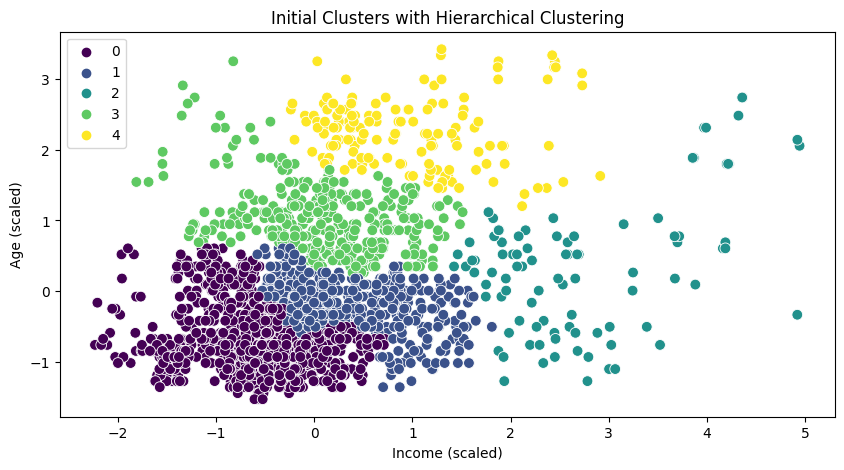

In [13]:

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Hierarchical Clustering
# Fitting Hierarchical Clustering model
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_clusters = hierarchical.fit_predict(scaled_features)

# Plotting initial clusters for Hierarchical Clustering
plt.figure(figsize=(10, 5))
sns.scatterplot(x=scaled_features[:, 1], y=scaled_features[:, 0], hue=hierarchical_clusters, palette="viridis", s=60)
plt.title("Initial Clusters with Hierarchical Clustering")
plt.xlabel("Income (scaled)")
plt.ylabel("Age (scaled)")
plt.legend()
plt.show()

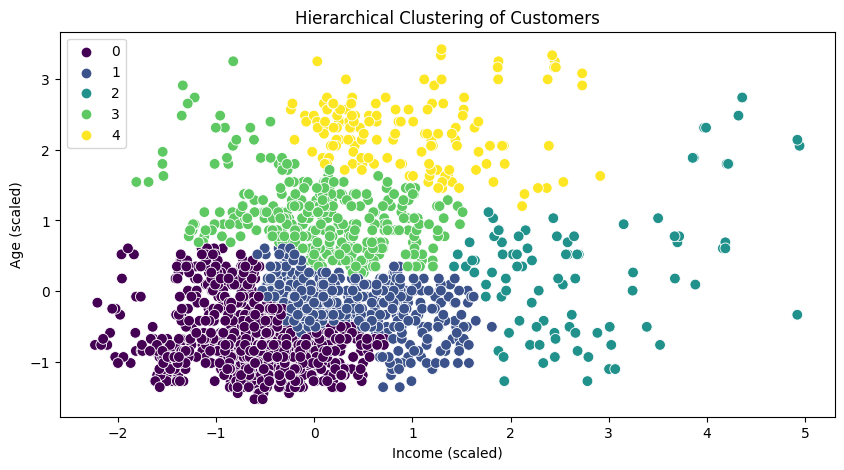

In [10]:
# Plotting Hierarchical clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(x=scaled_features[:, 1], y=scaled_features[:, 0], hue=hierarchical_clusters, palette="viridis", s=60)
plt.title("Hierarchical Clustering of Customers")
plt.xlabel("Income (scaled)")
plt.ylabel("Age (scaled)")
plt.show()

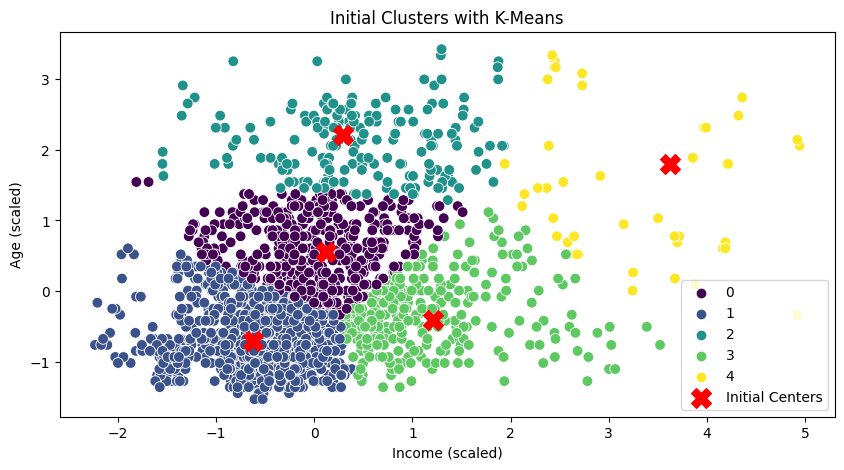

In [11]:
# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Initialize K-Means with only 1 iteration to capture the initial clusters
kmeans = KMeans(n_clusters=5, random_state=42, init='k-means++', max_iter=1, n_init=1)
kmeans.fit(scaled_features)

# Capture initial cluster assignments and centers
initial_clusters = kmeans.predict(scaled_features)
initial_centers = kmeans.cluster_centers_

# Plot initial clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(x=scaled_features[:, 1], y=scaled_features[:, 0], hue=initial_clusters, palette="viridis", s=60)
plt.scatter(initial_centers[:, 1], initial_centers[:, 0], c="red", marker="X", s=200, label="Initial Centers")
plt.title("Initial Clusters with K-Means")
plt.xlabel("Income (scaled)")
plt.ylabel("Age (scaled)")
plt.legend()
plt.show()

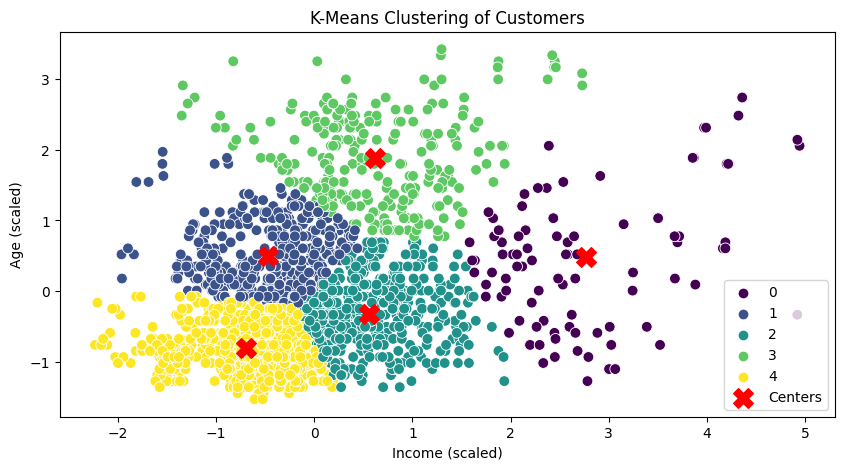

In [12]:
# Plotting K-Means clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(x=scaled_features[:, 1], y=scaled_features[:, 0], hue=final_clusters, palette="viridis", s=60)
plt.scatter(final_centers[:, 1], final_centers[:, 0], c="red", marker="X", s=200, label="Centers")
plt.title("K-Means Clustering of Customers")
plt.xlabel("Income (scaled)")
plt.ylabel("Age (scaled)")
plt.legend()
plt.show()